# Ch07_01.퍼셉트론(Perceptron) 함수

In [8]:
## 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기

## 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환
from sklearn import datasets # python 저장 데이터 가져오기

In [9]:
tiny_df = pd.read_csv('tinydata.csv')
tiny_df.head()

,Obs.,Fat,Salt,Acceptance
0,1,0.2,0.9,like
1,2,0.1,0.1,dislike
2,3,0.2,0.4,dislike
3,4,0.2,0.5,dislike
4,5,0.4,0.5,like


In [10]:
X = tiny_df.drop (['Obs.','Acceptance'], axis=1)
X = np.array(X)
X

array([[0.2, 0.9],
       [0.1, 0.1],
       [0.2, 0.4],
       [0.2, 0.5],
       [0.4, 0.5],
       [0.3, 0.8]])

In [11]:
y = tiny_df['Acceptance']
y = y.replace (['like','dislike'], [1,-1])
y.head()

0    1
1   -1
2   -1
3   -1
4    1
Name: Acceptance, dtype: int64

In [12]:
class Perceptron(object):

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):

        # rgen = np.random.RandomState(self.random_state)
        # self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.w_ = [-0.3, 0.05, 0.01]
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):

                print('== 초기 가중치(w)')
                print('self.w_ : ', self.w_)

                print('== Input(xi)')
                print('xi : ', xi)
                
                update = self.eta * (target - self.predict(xi))
                print('== 가중치 증가량(update)')
                print('target: ', target)
                print('self.predict(xi): ', self.predict(xi))
                print('(target - self.predict(xi)): ', target - self.predict(xi))
                print('self.eta: ', self.eta)
                print('update: ', update)
                               
                self.w_[0] += update
                self.w_[1:] += update * xi
                print('== 가중치 업데이트')
                print('update self.w_', self.w_)
                
                errors += int(update != 0.0)
                print('')
            
            self.errors_.append(errors)          
            print('==errors')
            print('errors', errors)

            
        return self

    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [27]:
ppn = Perceptron(eta=0.2, n_iter=100)

ppn.fit(X, y)

== 초기 가중치(w)
self.w_ :  [-0.3, 0.05, 0.01]
== Input(xi)
xi :  [0.2 0.9]
== 가중치 증가량(update)
target:  1
self.predict(xi):  -1
(target - self.predict(xi)):  2
self.eta:  0.2
update:  0.4
== 가중치 업데이트
update self.w_ [0.10000000000000003, 0.13, 0.37000000000000005]

== 초기 가중치(w)
self.w_ :  [0.10000000000000003, 0.13, 0.37000000000000005]
== Input(xi)
xi :  [0.1 0.1]
== 가중치 증가량(update)
target:  -1
self.predict(xi):  1
(target - self.predict(xi)):  -2
self.eta:  0.2
update:  -0.4
== 가중치 업데이트
update self.w_ [-0.3, 0.09, 0.33000000000000007]

== 초기 가중치(w)
self.w_ :  [-0.3, 0.09, 0.33000000000000007]
== Input(xi)
xi :  [0.2 0.4]
== 가중치 증가량(update)
target:  -1
self.predict(xi):  -1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.09, 0.33000000000000007]

== 초기 가중치(w)
self.w_ :  [-0.3, 0.09, 0.33000000000000007]
== Input(xi)
xi :  [0.2 0.5]
== 가중치 증가량(update)
target:  -1
self.predict(xi):  -1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0

xi :  [0.4 0.5]
== 가중치 증가량(update)
target:  1
self.predict(xi):  1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.3 0.8]
== 가중치 증가량(update)
target:  1
self.predict(xi):  1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

==errors
errors 0
== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.2 0.9]
== 가중치 증가량(update)
target:  1
self.predict(xi):  1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.1 0.1]
== 가중치 증가량(update)
target:  -1
self.predict(xi):  -1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.2 0.4]
== 가중치 증가량(update)
target:  -1
self.predict(

self.predict(xi):  -1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.4 0.5]
== 가중치 증가량(update)
target:  1
self.predict(xi):  1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.3 0.8]
== 가중치 증가량(update)
target:  1
self.predict(xi):  1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

==errors
errors 0
== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.2 0.9]
== 가중치 증가량(update)
target:  1
self.predict(xi):  1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.1 0.1]
== 가중치 증가량(update)
target:  -1
self.predict(xi):  -1
(target - self.predict(xi)):  0
self.e

update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.1 0.1]
== 가중치 증가량(update)
target:  -1
self.predict(xi):  -1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.2 0.4]
== 가중치 증가량(update)
target:  -1
self.predict(xi):  -1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.2 0.5]
== 가중치 증가량(update)
target:  -1
self.predict(xi):  -1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.4 0.5]
== 가중치 증가량(update)
target:  1
self.predict(xi):  1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

== 초기 가중치(w)
s

self.predict(xi):  1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

==errors
errors 0
== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.2 0.9]
== 가중치 증가량(update)
target:  1
self.predict(xi):  1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.1 0.1]
== 가중치 증가량(update)
target:  -1
self.predict(xi):  -1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.2 0.4]
== 가중치 증가량(update)
target:  -1
self.predict(xi):  -1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.2 0.5]
== 가중치 증가량(update)
target:  -1
self.predict(xi):  -1
(target - self.predict(xi)):  0
sel

target:  -1
self.predict(xi):  -1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.4 0.5]
== 가중치 증가량(update)
target:  1
self.predict(xi):  1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.3 0.8]
== 가중치 증가량(update)
target:  1
self.predict(xi):  1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

==errors
errors 0
== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.2 0.9]
== 가중치 증가량(update)
target:  1
self.predict(xi):  1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.1 0.1]
== 가중치 증가량(update)
target:  -1
self.predict(xi):  -1
(target - self.predict(xi)

== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.2 0.4]
== 가중치 증가량(update)
target:  -1
self.predict(xi):  -1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.2 0.5]
== 가중치 증가량(update)
target:  -1
self.predict(xi):  -1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.4 0.5]
== 가중치 증가량(update)
target:  1
self.predict(xi):  1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.3 0.8]
== 가중치 증가량(update)
target:  1
self.predict(xi):  1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

==errors
errors 0
== 초기 가중치(w

self.predict(xi):  -1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.4 0.5]
== 가중치 증가량(update)
target:  1
self.predict(xi):  1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.3 0.8]
== 가중치 증가량(update)
target:  1
self.predict(xi):  1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

==errors
errors 0
== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.2 0.9]
== 가중치 증가량(update)
target:  1
self.predict(xi):  1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.1 0.1]
== 가중치 증가량(update)
target:  -1
self.predict(xi):  -1
(target - self.predict(xi)):  0
self.e

update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.4 0.5]
== 가중치 증가량(update)
target:  1
self.predict(xi):  1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.3 0.8]
== 가중치 증가량(update)
target:  1
self.predict(xi):  1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

==errors
errors 0
== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.2 0.9]
== 가중치 증가량(update)
target:  1
self.predict(xi):  1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]

== 초기 가중치(w)
self.w_ :  [-0.3, 0.21, 0.49]
== Input(xi)
xi :  [0.1 0.1]
== 가중치 증가량(update)
target:  -1
self.predict(xi):  -1
(target - self.predict(xi)):  0
self.eta:  0.2
update:  0.0
== 가중치 업데이트
update self.w_ [-0.3, 0.21, 0.49]



In [75]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 설정합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

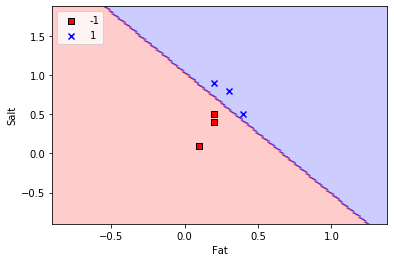

In [76]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Fat')
plt.ylabel('Salt')
plt.legend(loc='upper left')

plt.show()

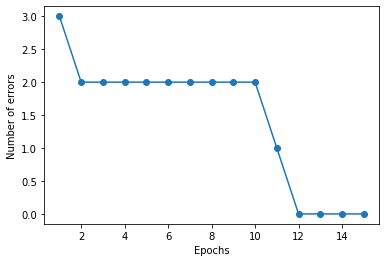

In [77]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')

plt.show()